In [1]:
# Import the necessary packages & libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

# Load the data set into the pandas data frame by using read_csv command
df = pd.read_csv(r'C:\Users\ashle\Downloads\D212\churn_clean.csv', keep_default_na=False)

In [2]:
# Explore the dataset in order to determine how to evaluate the input data by using the head() command
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Calculate total null values and total duplicate values in the dataset
total_nulls = df.isna().sum().sum()
total_dupes = df.duplicated().sum()

print(f"Total Nulls: {total_nulls}\nTotal Duplicate Records: {total_dupes}")

Total Nulls: 0
Total Duplicate Records: 0


In [5]:
# Drop columns that are unnecessary for the analysis
to_drop = ['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip',
           'Lat','Lng','Population','Area','TimeZone','Job','Children','Age','Income','Marital','Gender','Churn',
           'Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Techie','Contract','Port_modem',
           'Tablet','InternetService','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection',
           'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Item1','Item2',
           'Item3', 'Item4','Item5','Item6','Item7','Item8']
df.drop(columns=to_drop,inplace=True)

# Print column names to see what columns are left
print(df.columns)

Index(['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], dtype='object')


<Axes: xlabel='Tenure'>

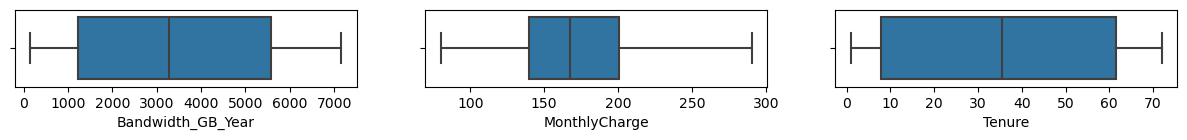

In [6]:
# VISUALIZE THE DATA FOR FURTHER EXPLANATION
# Create boxplots of columns to check for outliers
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 1))

plt.subplot(1, 3, 1)
sns.boxplot(x='Bandwidth_GB_Year', data = df)

plt.subplot(1, 3, 2)
sns.boxplot(x='MonthlyCharge', data = df)

plt.subplot(1, 3, 3)
sns.boxplot(x='Tenure', data = df)

In [7]:
# DATA PREPROCESSING
cluster_data = df[['Bandwidth_GB_Year','MonthlyCharge','Tenure']].describe().round(2)
cluster_data

,Bandwidth_GB_Year,MonthlyCharge,Tenure
count,10000.00,10000.00,10000.00
mean,3392.34,172.62,34.53
std,2185.29,42.94,26.44
min,155.51,79.98,1.00
25%,1236.47,139.98,7.92
50%,3279.54,167.48,35.43
75%,5586.14,200.73,61.48
max,7158.98,290.16,72.00


In [8]:
# Normalize data using z-score with StandardScaler from sklearn
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure']])
scaled_df = pd.DataFrame(scaled_df, columns = ['Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure'])
scaled_df.head()

,Bandwidth_GB_Year,MonthlyCharge,Tenure
0,-1.138487,-0.003943,-1.048746
1,-1.185876,1.630326,-1.262001
2,-0.612138,-0.295225,-0.709940
3,-0.561857,-1.226521,-0.659524
4,-1.428184,-0.528086,-1.242551


In [9]:
# Save to new file 
scaled_df.to_csv('D212_Task1.csv')

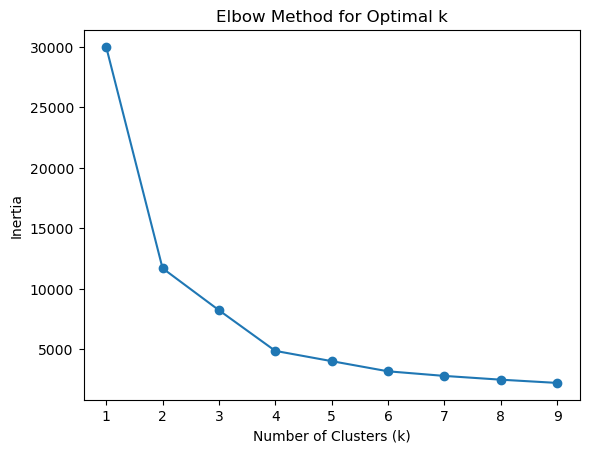

In [10]:
inertia = []
for k in range(1,10):
    k_model = KMeans(n_clusters=k, n_init=10)
    k_model.fit(scaled_df)
    inertia.append(k_model.inertia_)

# Plot the elbow graph 
plt.plot(range(1,10), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [11]:
# Create the k-means clustering model using k=4
model = KMeans(n_clusters=4)
model.fit(scaled_df)
model.labels_

array([3, 0, 3, ..., 1, 2, 2])

In [12]:
model.cluster_centers_

array([[-0.88789675,  0.98886275, -0.95681772],
       [ 0.90465205, -0.67406416,  0.95587643],
       [ 1.02365257,  1.01729384,  0.96710276],
       [-0.99689915, -0.68107432, -0.96341863]])

For n_clusters = 4, the silhouette score is 0.47558303153855375
For n_clusters = 5, the silhouette score is 0.4403318684071761
For n_clusters = 6, the silhouette score is 0.3993304346882913
For n_clusters = 7, the silhouette score is 0.39976548079270097
For n_clusters = 8, the silhouette score is 0.37114622341619213
For n_clusters = 9, the silhouette score is 0.35355120752505265
For n_clusters = 10, the silhouette score is 0.3582842972392715


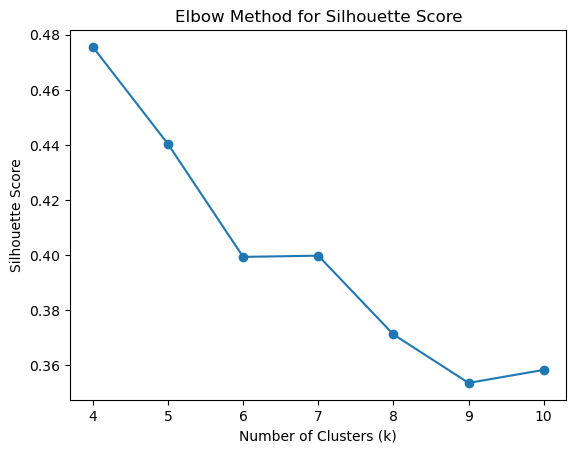

In [13]:
# Calculate the silhouette score
cluster_range = range(4,11)
sil_score = []

for k in cluster_range: 
    k_model = KMeans(n_clusters=k, n_init=10)
    k_model.fit(scaled_df)
    sil_average = silhouette_score(scaled_df, k_model.labels_)
    sil_score.append(sil_average)
    print(f"For n_clusters = {k}, the silhouette score is {sil_average}")
    
# Plot the silhouette score 
plt.plot(cluster_range, sil_score, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Silhouette Score')
plt.show()

In [14]:
# Calculate the WCSS (Within Cluster Sum of Squares); another name for Inertia
wcss = model.inertia_

# Calculate the silhouette score
labels = model.labels_
silhouette_average = silhouette_score(scaled_df, labels)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_df, labels)

# Print the calculations
print("WCSS/Inertia:", wcss)
print("Silhouette Score:", silhouette_average)
print("Davies-Bouldin Index:", db_index)

WCSS/Inertia: 4882.841678857103
Silhouette Score: 0.47562871470453655
Davies-Bouldin Index: 0.7579076724393521
